# Oasis Infobyte 

# Task 2
UNEMPLOYMENT ANALYSIS WITH PYTHON

Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science project.

In [1]:
import numpy as np#importing requirted libraries
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar


In [2]:
df=pd.read_csv("Unemployment in India.csv")

### Data Description

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df.shape

(768, 7)

In [5]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [6]:
df.isnull().sum()


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [7]:
df.dropna(inplace=True)

### Changing Date Format

In [8]:
df['Date'] = pd.to_datetime(df[' Date'], dayfirst=True)#changing date format
df['Frequency']= df[' Frequency'].astype('category')
df['Month'] =  df['Date'].dt.month#adding month column
df['Month']

0      5
1      6
2      7
3      8
4      9
      ..
749    2
750    3
751    4
752    5
753    6
Name: Month, Length: 740, dtype: int32

In [9]:
df['Month_Num'] = df['Month'].apply(lambda x : int(x))
df['Month_Name'] =  df['Month_Num'].apply(lambda x: calendar.month_abbr[x])
df['Region'] = df['Region'].astype('category')
df['Month_Num']

0      5
1      6
2      7
3      8
4      9
      ..
749    2
750    3
751    4
752    5
753    6
Name: Month_Num, Length: 740, dtype: int64

In [10]:
df.drop(columns='Month',inplace=True)
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Date,Frequency,Month_Num,Month_Name
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,2019-05-31,Monthly,5,May
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,2019-06-30,Monthly,6,Jun
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,2019-07-31,Monthly,7,Jul
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,2019-08-31,Monthly,8,Aug
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,2019-09-30,Monthly,9,Sep


### Describing about EUR, EE and ELPR

In [11]:
df_stats = df[[' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']]
round(df_stats.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),740.0,11.79,10.72,0.00,4.66,8.35,15.89,76.74
Estimated Employed,740.0,7204460.03,8087988.43,49420.00,1190404.50,4744178.50,11275489.50,45777509.00
Estimated Labour Participation Rate (%),740.0,42.63,8.11,13.33,38.06,41.16,45.50,72.57


In [12]:
region_stats = df.groupby(['Area'])[[' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']].mean().reset_index()
region_stats = round(region_stats,2)

region_stats

,Area,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,Rural,10.32,10192852.57,44.46
1,Urban,13.17,4388625.58,40.90


### Plotting the Heatmap

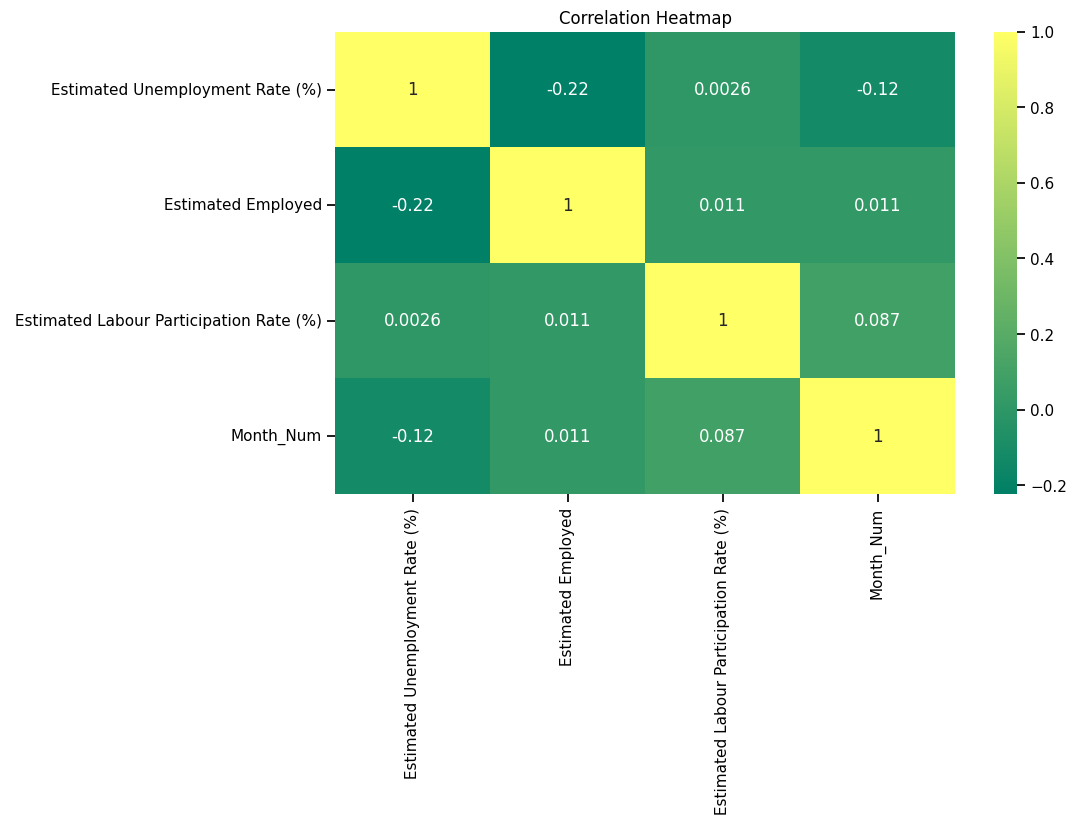

In [13]:
heatmaps = df[[' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Month_Num']]
heatmaps_corr = heatmaps.corr()

# Plotting the Figure
plt.figure(figsize=(10, 6))
sns.set_context('notebook', font_scale=1)
sns.heatmap(heatmaps_corr, annot=True, cmap='summer')

plt.title('Correlation Heatmap')
plt.show()